In [1]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

In [2]:
def random_matrix(shape):
    A = np.random.rand(shape[0], shape[1])*50
    return A

def random_integer_matrix(shape):
    return np.floor(random_matrix(shape))

(350, 350)
125.016227649 120.910921562


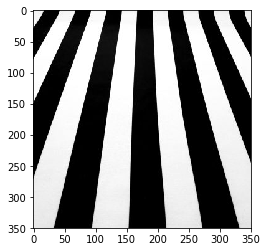

In [58]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

X = random_integer_matrix((5,15))
# print(X)

im = Image.open("image/image5.jpg")
data_orig = rgb2gray(np.array(im))
print(data_orig.shape)
print(np.mean(data_orig), np.std(data_orig))
plt.imshow(data_orig, cmap='gray')
plt.show()

In [59]:
# Hyperparamters
X = data_orig

W = X.shape[0]
K = X.shape[1]
shape = (W, K)
I = 200
T_shape = (W, I)
V_shape = (I, K)

In [71]:
# Gibbs Sampler
print(np.mean(X), np.std(X))

# Initialization

# mean = gamma_scale * gamma_shape
# variance = gamma_scale * gamma_shape^2

data_variance = (np.std(X)/(I/5))**2
data_mean = np.mean(X)/I*1.3
print(data_mean, data_variance)

gamma_scale = data_variance/data_mean # b/sqrt(a) == std
gamma_shape = data_mean/gamma_scale
print(gamma_scale, gamma_shape)

A_t = np.ones(T_shape)*gamma_shape
B_t = np.ones(T_shape)*gamma_scale
A_v = np.ones(V_shape)*gamma_shape
B_v = np.ones(V_shape)*gamma_scale

T = np.random.gamma(A_t,B_t)
V = np.random.gamma(A_v,B_v)
print(np.mean(np.dot(T,V)), np.std(np.dot(T,V)))

mean_diff = np.mean(np.abs(X - np.dot(T,V)))
print("Random loss: ", mean_diff)

125.016227649 120.910921562
0.812605479718 9.13715684554
11.2442717574 0.0722683956105
132.324730094 135.022384515
Random loss:  140.610260851


In [92]:
# Loop
max_iter = 100
for n in range(max_iter):
    
    p = np.zeros((W, I ,K))
    S = np.zeros((W, I ,K))
    
    for v in range(W):
        for t in range(K):
#             print(T.shape, V.shape, p.shape, t,v)
            p[v, :, t] = ((T[[v],:]*V[:, [t]].transpose())/
                         np.dot(T[[v],:],V[:, [t]]))
            S[v, :, t] = np.random.multinomial(X[v,t], p[v, :, t].squeeze())
    
    sigma_t = np.sum(S, axis=2)
    sigma_v = np.sum(S, axis=0)
    
#     print(T.shape, V.shape, W, K)
    
    alpha_t = A_t + sigma_t
    beta_t = 1./(A_t/B_t + 
                 np.dot(np.ones((W,1)), 
                        np.dot(V, np.ones((K,1))).T))
    
    alpha_v = A_v + sigma_v
    beta_v = 1./(A_v/B_v + 
                 np.dot(np.dot(np.ones((W,1)).T, T).T,
                        np.ones((K,1)).T))

    T = np.random.gamma(alpha_t, beta_t)
    V = np.random.gamma(alpha_v, beta_v)
    
    if n % 1 == 0:
        mean_diff = np.mean(np.abs(X - np.dot(T,V)))
        print("epoch %d: loss: "%n, mean_diff)

epoch 0: loss:  16.6239073156
epoch 1: loss:  17.4485429406
epoch 2: loss:  16.4116284131
epoch 3: loss:  17.2735650342
epoch 4: loss:  16.2134336217
epoch 5: loss:  17.1007816459
epoch 6: loss:  16.0588749625
epoch 7: loss:  16.9129425795
epoch 8: loss:  15.8660043927
epoch 9: loss:  16.7256232945
epoch 10: loss:  15.6977395789
epoch 11: loss:  16.5266864121
epoch 12: loss:  15.5232325255
epoch 13: loss:  16.3181779293
epoch 14: loss:  15.3327557925
epoch 15: loss:  16.1497710928
epoch 16: loss:  15.1855997487
epoch 17: loss:  16.0172393723
epoch 18: loss:  15.0536929655
epoch 19: loss:  15.8817641855
epoch 20: loss:  14.9335509035
epoch 21: loss:  15.7896777251
epoch 22: loss:  14.8152010233
epoch 23: loss:  15.649394329
epoch 24: loss:  14.6812182013
epoch 25: loss:  15.5158597436
epoch 26: loss:  14.5492955356
epoch 27: loss:  15.382669718
epoch 28: loss:  14.4616305263
epoch 29: loss:  15.3184429077
epoch 30: loss:  14.3621464062
epoch 31: loss:  15.1997779013
epoch 32: loss:  14.

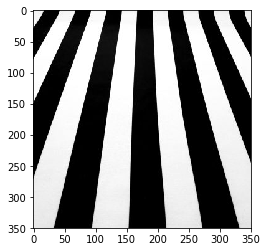

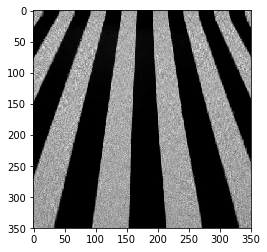

In [93]:
# print(X)
# print(np.dot(T,V))

plt.imshow(X, cmap='gray')
plt.show()
plt.imshow(np.dot(T,V), cmap='gray')
plt.show()

In [94]:
print(np.mean(X), np.std(X))
print(np.mean(np.dot(T,V)), np.std(np.dot(T,V)))

125.016227649 120.910921562
130.462049746 127.116255263
